In [2]:
# Import the plot_acf module from statsmodels
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

np.random.seed(1)

# Contents

[1. Difference equations](#1.-Difference-equations)
   - 1.1 Recursive subsitution
   - 1.2 Pth order difference equations
   - 1.2 Eigen values
   - 1.3 General solution of pth-order difference equation with distinct eigen values   
   
[2. Lag operators](#2.-Lag-operators)
   - 2.1 Lag operators
   - 2.2 1st order difference equations with lag operators
   - 2.3 2nd order difference equations with lag operators
   - 2.4 2nd order difference equations with lag operators
   - 2.5 Initial conditions and unbounded sequences

[3. Stationarity](#3.-Stationarity)
   - 3.1 Asymptotic least squares assumptions
   - 3.2 Law of Large Numbers
   - 3.3 Expectations
   - 3.4 Stationarity
   - 3.5 Erodicity
   - 3.6 Conditions for stationarity
   - 3.7 Visualize stationarity

[4. ARMA Processes](#4.-ARMA-Processes)
   - 4.1 Autocorrelation
   - 4.2 White noise
   - 4.3 Moving average process (MA)
   - 4.4 Autoregressive process (AR)
   - 4.5 Mixed autoregressive moving average processes
   - 4.6 Autocovariance generating function
   - 4.7 Visualize stationarity
   - 4.8 Review of AR, MA, ARMA
             
[5. Non-stationary Models](#5.-Non-stationary-Models)
   - 5.1 Introduction
   - 5.2 Linear time trends & unit roots
   - 5.3 Comparison of dynamic multipliers
   - 5.4 The meaning of unit roots
   - 5.5 Other approaches to trended series
   - 5.6 Random walks

[6. Processes with Deterministic Time Trends](#.-Processes-with-Deterministic-Time-Trends)
   - 6.1 Asymptotic distribution of OLS estimates of simple time trend model

[7. Univariate processes with unit roots](#.-Univariate-processes-with-unit-roots)
   - 7.1 Dickey-Fuller
   - 7.2 Augmented dickey fuller
   - 7.3 Dickey Fuller test-AR with trend
   - 7.4 Testing order of integration

[8. Multivariate processes with unit roots](#.-Multivariate-processes-with-unit-roots)

[9. Cointegration](#9.-Cointegration)


# References

- Cochrane, John H. ["Time series for macroeconomics and finance."](http://econ.lse.ac.uk/staff/wdenhaan/teach/cochrane.pdf) University of Chicago (2005): 1-136.


- Creel, Michael. [Econometrics](https://github.com/mcreel/Econometrics/blob/master/econometrics.pdf)


- Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896) *Princeton University.* (1994)


- Lambert, Ben. [A graduate course in econometrics](https://www.youtube.com/playlist?list=PLwJRxp3blEvaxmHgI2iOzNP6KGLSyd4dz)


- Mikusheva, Anna . 14.384 [Time Series Analysis](https://ocw.mit.edu/courses/economics/14-384-time-series-analysis-fall-2013/). Fall 2013. Massachusetts Institute of Technology: MIT OpenCourseWare, https://ocw.mit.edu/. License: Creative Commons BY-NC-SA.



- Sargent, Thomas J. and John Stachurski. Quantitative Economics: ["Time Series Models."](https://python.quantecon.org/index_time_series_models.html)


# 1. Difference equations

## 1.1 Recursive substitution
<a id='recursive'></a>
$y_0 = \phi y_{-1} + w_0\\
y_1 = \phi y_{0} + w_1\\
y_2 = \phi y_{1} + w_2\\
y_t = \phi y_{t-1} + w_t\tag{1.1.1}$

Recursive substition:

$y_1 = \phi y_{0} + w_t = \phi(\phi_{-1}+w_0)+w_1\\
y_1 = \phi^2 y{-1} + w_0$

Continuing recursively:

$y_t = \phi^{t+1} y_{-1} + \phi^{t}w_0+ \phi^{t-1}w_1+\phi^{t-2}w_2 + \cdots + \phi w_{t-1}+ w_t \tag{1.1.7}$


### 1.1.2 Dynamic Multipliers


Differentiate 1.1.7:
$\frac{\partial Y_t}{\partial w_0} = \phi^t \tag{1.1.8}$ 

It can be described as a function of $y_{t-1}, w_t, w_{t+1}... w_{t+j}$

$y_{t+j} = \phi^{j+1}y_{t-1} +\phi^jw_t + \phi^{j-1}w_{t+1} + \phi^{j-2}w_{t+2}+ \cdots +\phi w_{t+j-1}+ w_{t+j} \tag{1.1.9}$


#### The effect of $w_t$ on $y_{t+j}$, also known as the dynamic multiplier:

<a id='dynamic-multiplier1'></a>

### $\frac{\partial Y_{t+j}}{\partial w_t} = \phi^j \tag{1.1.10}$

"The dynamic mulitplier 1.1.10 depends only on j, the length of time seperating the distrubance ot the input $w_t$ and the observed value of the output $(y_{t+j})$, the multiplier does not depend on t. It does not depend on the dates of the observations themselves. This is true of any linear difference equation. (Hamilton 1994)"

### Example from 1.1.2

Money demand function (Goldfeld 1973):

$m_t =0.27+0.72m_{t-1}+0.19I_t-0.045r_{bt}-0.019r_{ct} \tag{1.1.2}$

Simplify by adding $w_t$ constant:
$$w_t = 0.27+0.19I_t-0.045r_{bt}-0.019r_{ct}$$

$$\rightarrow m_t =0.27+0.72m_{t-1}+w_t$$

Which can be simplified to a general time series equation:

$$y_t = .27 + .72y_{t-1} + w_t$$

Find the money demand two quarters from now:

$\frac{\partial m_{t+2}}{\partial I_t} = \frac{\partial m_{t+2}}{\partial w_t} \times \frac{\partial w_{t}}{\partial I_t} = \phi^2 \times \frac{\partial w_{t}}{\partial I_t}$

$$\frac{\partial m_{t+2}}{\partial I_t} = (.72)^2(.19) = .098$$

- If $0<\phi<1$ the multiplier decays geometrically toward zero
- $\phi>1$ explosive growth
- $\phi<1$ explosive oscilating growth


## 1.2 Pth order difference equations

$y_t = \phi_{1} y_{t-1} + \phi_2 y_{t-2}+ \cdots + \phi_p y_{t-p}+w_t \tag{1.2.1}$

This can be re-written in a vector $\xi_t$

$\underset{Px1}{\xi_t} \equiv \begin{bmatrix} y_t \\ y_{t-1} \\ y_{t-2} \\ \vdots \\ y_{t-p+1} \end{bmatrix} \tag{1.2.2}$

$\underset{PxP}{F} \equiv \begin{bmatrix} \phi_1 & \phi_2 & \phi_{p-1} & \phi_{p} 
\\1 &0& 0& 0 
\\0 &1& 0& 0
\\0 &0& 1& 0
\end{bmatrix}\tag{1.2.3}$

$\underset{Px1}{v_t} \equiv \begin{bmatrix} w_t \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} \tag{1.2.4}$

Consider the first order vector difference equation:

$\xi_t = F \xi_{t-1}+ v_t \tag{1.2.5}$

$$\begin{bmatrix} y_t \\ y_{t-1} \\ y_{t-2} \\ \vdots \\ y_{t-p+1}\end{bmatrix}  = 
\begin{bmatrix} \phi_1 & \phi_2 & \phi_{p-1} & \phi_{p} 
\\1 &0& 0& 0 
\\0 &1& 0& 0
\\0 &0& 1& 0
\end{bmatrix} \begin{bmatrix} y_{t-1} \\ y_{t-2} \\ y_{t-3} \\ \vdots \\ y_{t-p}\end{bmatrix}+ \begin{bmatrix} w_t \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}$$

### 1.2.1 Example: Dynamic multiplier for pth order difference equations

A dynamic multiplier can be found in the same way as a first-order scalar system. If we know the value of the vector $\xi$ for date t=-1 and of v for date t=0 we can find $\xi$ for date 0

$\xi_0 = F\xi_{-1} +v_0$

Value for $\xi$ for date 1:

$\xi_1 = F\xi_{0} +v_1 = F(F\xi_{-1}+v_0)+v_1 = F^2 \xi_{-1} +Fv_0 + v_1$

Continuing recursively:

$\xi_t = F^{t+1}\xi_{-1} + F^t v_0 + F^{t-1}v_1+ F^{t-2}v_2 + \cdots + Fv_{t-1}+v_t \tag{1.2.6}$


$\begin{bmatrix} y_t \\ y_{t-1} \\ y_{t-2} \\ \vdots \\ y_{t-p+1}\end{bmatrix}
= F^{t+1}\begin{bmatrix} y_{-1} \\ y_{-2} \\ y_{-3} \\ \vdots \\ y_{-p}\end{bmatrix} + 
F^t \begin{bmatrix} w_0 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} + 
F^{t-1}\begin{bmatrix} w_1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}+ 
F^{1}\begin{bmatrix} w_{t-1} \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} + 
\begin{bmatrix} w_t \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} \tag{1.2.7}$

Let $f_{11}^{(t)}$ denote the (1,1) element of $F^t$ then 1.2.7 can be written

$y_t = f_{11}^{(t)}y_{-1}+f_{12}^{(t+1)}y_{-2}+\cdots +f_{1p}^{(t+1)}y_{-p}+ f_{11}^{(t)}w_0+f_{11}^{(t-1)}w_1 \cdots + f_{11}^{(1)}w_{t-1}+ w_t \tag{1.2.8}$

Generalizing the equation as we did in 1.1.9: Substituting $\xi$ for y, F for $\phi, w for v$
$y_{t+j} = \phi^{j+1}y_{t-1} +\phi^jw_t + \phi^{j-1}w_{t+1} + \phi^{j-2}w_{t+2}+ \cdots +\phi w_{t+j-1}+ w_{t+j} \tag{1.1.9}$

$\xi_{t+j} = F^{j+1}\xi_{t-1} +F^j v_t + F^{j-1}v_{t+1} + F^{j-2} v_{t+2}+ \cdots + F v_{t+j-1}+ v_{t+j} \tag{1.2.9}$

From which we slightly modify 1.2.8 $y_{t+j}$ 

$y_{t+j} = f_{11}^{(t)}y_{t-1}+f_{12}^{(t+1)}y_{t-2}+\cdots +f_{1p}^{(t+1)}y_{t-p}+ f_{11}^{(t)}w_t+f_{11}^{(t-1)}w_{t+1} \cdots + f_{11}^{(1)}w_{t+j-1}+ w_{t+j}\tag{1.2.10}$

#### Thus the dynamic multiplier for the pth order difference equation is:

### $\frac{\partial y_{t+j}}{\partial w_t} = f^j_{11} \tag{1.1.11}$

Where $f^j_{11}$ denotes the 1,1 element of $F^j$. 

Thus for any pth order system, the effect on $Y_{t+1}$ of a one unit increase in $w_t$ is given by the coefficient relating $y_t$ to $y_{t-1}$:

- $\frac{\partial y_{t+1}}{\partial w_t} = \phi_1$
- $\frac{\partial y_{t+2}}{\partial w_t} = \phi_1^2+\phi_2$

### 1.2 Eigen values of pth order

Eigen values of F matrix:

$|F-\lambda I_p| = 0$

Example: for p=2 the eigen values are solutions to

$\Big|\begin{bmatrix} \phi_1 & \phi_2 \\ 1&0\end{bmatrix}-\begin{bmatrix} \lambda & 0 \\ 0&\lambda \end{bmatrix} \Big|\\
\rightarrow \lambda^2 -\phi_1\lambda-\phi_2 =0 \tag{1.2.13}$

Therefore the two eigenvalues of F for a second-order difference equation are:

$\lambda_1 = \frac{\phi_1 + \sqrt{\phi_1^2+ 4\phi_2}}{2} \tag{1.2.14}$

$\lambda_2 = \frac{\phi_1 - \sqrt{\phi_1^2+ 4\phi_2}}{2} \tag{1.2.15}$

- "Once we know the eigenvalues it is straighforward to characterize the dynamic behavior of the system. (Hamilton 1994)"

## 1.3 General solution of pth-order difference equation with distinct eigenvalues

If Eigenvalues of a PxP matrix F are distinct there exists a nonsingular PxP matrix T

$F=T \Lambda T^{-1} \tag{1.2.17}$

Where $\Lambda$ is a PxP matrix with eigen values of F along the principal diagonal:

$\Lambda = \begin{bmatrix} \lambda_1 & 0 & 0 & 0 
\\0 &\lambda_2& 0& 0 
\\0 &0& \lambda_3& 0
\\0 &0& 0& \lambda_p
\end{bmatrix} \tag{1.2.18}$

In general we can characterize the dynamic mulitiplier of $F^j$ using $\lambda$:

$F^j = T \Lambda T^{-1} \tag{1.2.19}$

$$\Lambda^j = \begin{bmatrix} \lambda_1^j & 0 & 0 & 0 
\\0 &\lambda_2^j& 0& 0 
\\0 &0& \lambda_3^j& 0
\\0 &0& 0& \lambda_p^j
\end{bmatrix}$$

From 1.2.19 we can denoate element $F^j$:

$f^{j}_{11} =[t_{11}t^{11}]\lambda^j_1+[t_{12}t^{21}]\lambda^j_2+ [t_{1p}t^{p1}]\lambda^j_p$

Simplifying $[t_{11}t^{11}]= c_1$:

$f^{j}_{11} = c_1\lambda^j_1+c_2\lambda^j_2+ c_p\lambda^j_p \tag{1.2.20}$

Where

$c_i=[t_{1i}t^{i1}]\tag{1.2.21}$

Subsituting 1.2.20 into 1.2.11 to form a dynamic multiplier for pth order difference equation in terms of $\lambda$

### $\frac{\partial y_{t+j}}{\partial w_t} = c_1 \lambda_1^j+ c_2 \lambda_2^j + \cdots + c_p\lambda_p^j \tag{1.1.24}$

"Equation 1.2.24 characterizes the dyamic multiplier as a weighted average of each p eigen values raised to the jth power"

The magnitude of $c_i$ in 1.2.21 can be written
$c_i = \frac{\lambda_i^{p-1}}{\underset{k=1, k\neq i}{\Pi^p}(\lambda_i-\lambda_k)}  \tag{1.1.25}$


### 1.3.1 Example: 

$y_t = 0.6y_{t-1}+0.2y_{t-2}+ w_t$

From 1.2.14 & 1.2.15 we have:

$\lambda_1 = \frac{.6 + \sqrt{.6^2+ 4(0.2)}}{2}= .84$

$\lambda_2 = \frac{.6 - \sqrt{.6^2+ 4(0.2)}}{2} = -.24$

From 1.2.25 we have:
$c_1 = \frac{\lambda_1}{\lambda_1-\lambda_2} =.778$
$c_2 = \frac{\lambda_2}{\lambda_2-\lambda_1} =.22$

The dynamic multiplier for this system:

### $\frac{\partial y_{t+j}}{\partial w_t} = c_1\lambda^j_1 + ^c_2\lambda_2^j $

- If the eigenvalues are real but at least one is greater than unity in absolute value, the system is explosive.
- Eigenvalues can also be complex.


Reference for section 1: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 1. Difference equations.  *Princeton University.*


# 2. Lag operators

## 2.1 Lag operators

1. Denoted L:
    - $Ly_t = y_{t-1}$
    - $L^2y_t = y_{t-2}$
    - $L^k x_t = x_{t-k}$
    - $L^{-k}x_t= x_{t+k}$

2. Lag operators are commutative (can be multiplied):
    - $a(L)b(L)=b(L)a(L)$

3. Lag operators are distributive
    - $L(x_t+w_t) = Lx_t +Lw_t$

4. Lag polynomials can be inverted
    - Lag polynomial = $a(L) = a_0 + a_1L +a_2L^2 + \cdots + a_pL^p$
 $(1-pL)(1-pL)^-1 = 1 \tag{p=1}$
 $(1-pL)^-1 = \sum p^iL^i \tag{p<1}$


## 2.2 1st order difference equations with lag operators

Using lag operators our equation 1.1.1 $y_t = \phi y_{t-1} + w_t$ can be re-written:

$y_t = \phi Ly_t + w_t \tag{2.1.3}$

This can be rearranged to:

$(1-\phi L) y_t = w_t \tag{2.2.2}$

Provided that $\phi$<1:

$y_t = (1-\phi L)^{-1}w_t \\
\rightarrow y_t = w_t + \phi w_{t-1}+ \phi^2 w_{t-2}+ \phi^3 w_{t-3}+\cdots \tag{2.2.9}$

## 2.3 2nd order difference equations with lag operators

Rewrite $y_t = \phi_1 y_{t-1}+ \phi_2 y_{t-2}+ w_t$ in lag operator form:

$(1-\phi_1 L- \phi_2L^2)y_t = w_t \tag{2.3.2}$ 

Factoring out $\lambda_1, \lambda_2$

$(1-\phi_1 L- \phi_2L^2)y_t= (1-[\lambda_1+\lambda_2]L + \lambda_1 \lambda_2 L^2) \tag{2.3.3}$

The idea is to choose a values of $\lambda$ that will make sure the operator of of 2.3.3 is identical to the left side. 

- $\lambda_1\lambda_2=-\phi_2$
- $\lambda_1+\lambda_2=\phi_1$

This will be true whenever the following represent the identical functions of Z:

$(1-\phi_1Z - \phi_2 Z^2)y_t= (1-\lambda_1Z)(1-\lambda_2Z) \tag{2.3.5}$


$z_1 = \frac{\phi_1 - \sqrt{\phi_1^2+ 4\phi_2}}{-2} \tag{2.3.7}$

$z_2 = \frac{\phi_1 + \sqrt{\phi_1^2+ 4\phi_2}}{-2} \tag{2.3.8}$



2.3 Example: If $\theta=0.6$ and $\phi=-0.08$ 

$z_1 = \frac{.6 - \sqrt{.6^2+ 4(0.08)}}{2}= 2.5$

$z_2 = \frac{.6 + \sqrt{.6^2+ 4(0.08)}}{2} = 5$


$\lambda_1 = 1/2.5 = 0.4\\
\lambda_2 = 1/5 = 0.2$

## 2.4 2nd order difference equations with lag operators

Equation 1.2.1 $y_t = \phi_{1} y_{t-1} + \phi_2 y_{t-2}+ \cdots + \phi_p y_{t-p}+w_t$ can be re-written in lag operators as:

$(1-\phi L-\phi_tL^2-\cdots-\phi_pL^p) y_t  = w_t \tag{2.4.2}$

Factoring out the left side of 2.4.2

$(1-\lambda_1L)(1-\lambda_2L) \cdots (1-\lambda_pL) \tag{2.4.3}$


Reference for section 2: Hamilton, J. D.  [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 2. *Princeton University.*


# 3. Stationarity

### 3.1 Asymptotic least square assumptions
Review:Guass Markov
- $E[\hat \beta_{least squares}] = \beta$

- $\hat \beta_{least squares} \xrightarrow{p} \beta$


1. Linear
2. Stationary & weakly dependent
3. $E[u_t| x_{it}] = 0$
    - Less restrictive than GM (Strict exogenity) which says:  $E[u_t|x_{is}]=0, \forall s,s=t$
4. No perfect collinearity
5. $Var(u_t|x_{it}=\sigma^2)$
    - Less restrictive than GM:  $var(u_t|x_{is})=\sigma^2$
5. $Covar(u_{t1} u_s|x_{t1},x_s=0$
    - Less restrictive than GM:  $Covar(u_{t1} u_s|x_{ik})=0, \forall k$

$\underline{Takeaway}$: The difference is mainly that GM holds for all time periods ($\forall k$) while time series does not

Refrence: Lambert, Ben. [A graduate course in econometrics](https://www.youtube.com/playlist?list=PLwJRxp3blEvaxmHgI2iOzNP6KGLSyd4dz)


## 3.2 Law of Large Numbers
Review the normal proof of Law of Large Numbers (LLN):

$E(\frac{1}{n}\sum x_i-u^2) = Var(\frac{1}{n}\sum x_i) \tag{1}$
$(\frac{1}{n^2}\sum x_i) \tag{2}$

Under the assumption of iid: 
$\frac{1}{n^2}Var(x_i) \tag{3}$
$\frac{n \sigma^2}{n^2}\rightarrow 0 \tag{4}$

- But in the case of time series which often do not have independence i.e. $Ex_i= \mu , Var(x_i)=\sigma^2$

In this case we return to step 2:

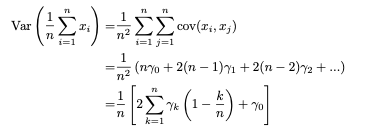

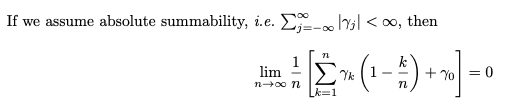
##### Takeaway:
-  "If xt is a weakly stationary time series(with mean $\mu$) with absolutely summable auto-covariances then a law of large numbers holds (Mikusheva)."



Refrence: Mikusheva, Anna. [Time Series Analysis](https://ocw.mit.edu/courses/economics/14-384-time-series-analysis-fall-2013/).


## 3.3 Expectations

#### Unconditional density of Gaussian white noise process:

$$fY_t(y_t) = \frac{1}{\sqrt{2\pi\sigma}} exp\Big[ \frac{-y_t^2}{2\sigma^2}\Big]$$

#### The expectation of the t-th observation of time series is the mean of the probability distribution:

$E(Y_t) \equiv \int^{\infty}_{-\infty}y_tfY_t(y_t)dy_t \tag{3.1.3}$

- Viewed as the probability limit of the ensemble average:

$E(Y_t) = \underset{I\rightarrow\infty}{1/I} \sum_{i=1}^{I} Y_t^{i} \tag{3.1.4}$


#### The unconditional mean of $Y_t$:

$$E(Y_t) \mu_t$$

This allows the mean to be a function of the date of the observation t. 

#### The variance of random variable $Y_t$, denoted $\gamma_{0t}$ is:

$E(Y_t) \equiv E(Y_t-\mu_t)^2 = \int^{\infty}_{-\infty}(y_t-\mu_t)^2 fY_t(y_t)dy_t \tag{3.1.9}$

#### Autocovariance:

$$E(Y_t-\mu_t)(Y_{t-j}-\mu_{t-j})\tag{3.1.10}$$

- Viewed as the probability limit of the ensemble average:

$E(Y_t) = \underset{I\rightarrow\infty}{1/I} \sum_{i=1}^{I}[Y_t^{(i)}-\mu_t][Y_{t-j}^{(i)}-\mu_{t-j}] \tag{3.1.11}$

Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 3. *Princeton University.*

## 3.4 Stationarity
- If a process is covariance stationary the covariance between $Y_t Y_{t-j}$ only depends on j, the length of time separating the observations.
- Covariance stationary does not dependon the date t
- Therefore it follows that covariance stationary process $\gamma_j \ \ \text{and} \ \ \gamma_{-j}$ are the same magnitude

$\gamma_j= E(Y_t-\mu)(Y_{t-j}-\mu)\tag{3.1.12}$

Thus for any covariance stationary process:

$\gamma_j= \gamma_{-j}\tag{3.1.13}$



- If a process is strictly stationary with finite second moments, then it must be covariance stationary if the densities over which we integrate the process do not depend on time. 
- Stationary can be taken to mean "covariance stationary (Hamilton, 1994)". 

Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 3. *Princeton University.*
### Strict stationarity:

- A process, {yt}, is strictly stationary if for each k, t and n, the distribution of {yt, ..., yt+k} is the same as the distribution of {yt+n, ..., yt+k+n} 


1. Mean: $\mu(t)=E(X_t)$
1. Variance: $\sigma^2(t)=var(X_t)$
1. Autocovariance: $\gamma(t_1,t_2)=cov(X_{t1}, X_{t2})$


### Weak stationarity

- ${y_t}$, is 2nd order stationary(or weakly stationary, or simply stationary) if $E[y_t]$, $E[y_{2t}]$
- And if $cov(y_t, y_{t+k})$ do not depend on t

Refrence: Mikusheva, Anna. [Time Series Analysis](https://ocw.mit.edu/courses/economics/14-384-time-series-analysis-fall-2013/).


### Strict exogenity

$y_t = \alpha +\beta x_t +u_t$

- Strict exogenity: Time series
$E[u_t|x_s] = 0, s=t \forall s$

- Strict exogenity: Cross section
$E[u_t|x_i] = 0$

#### Intuition: Strict exogenity

1. Lagged independent variables:
    - $gdp_t= \alpha+\beta \text{monetary_policy}_t + u_t$
    - The error at $u_t$ contains correlation with $\text{monetary_policy}_{t-1}$
    - $E[u_t|\text{monetary_policy}_s]\neq 0$
    - Thus $\beta_ols > \beta$ 
    - This is because monetary policy at time t is taking some of the credit at period $t_{-1}$
  
Reference: Lambert, Ben. [A graduate course in econometrics](https://www.youtube.com/playlist?list=PLwJRxp3blEvaxmHgI2iOzNP6KGLSyd4dz)

## 3.5 Ergodicity:

#### The sample mean of a time series:

$\bar y \equiv (1/T)\sum^T_{t=1}y_t^{(1)}\tag{3.1.14}$

- A covariance stationary process is ergodic for the mean if 3.1.14 converges in probability to $E(Y_t)$ as $T\rightarrow \infty$
- A process is ergodic for the mean if autocovariance $\gamma_j$ goes to zero as j becomes large.

Process ${Y_t}$ is Ergodic for the mean:
$\sum_{j=0}^{\infty}|\gamma_{j}|<\infty \tag{3.1.15}$

A covariance-stationary process is ergodic for the second moments if:

$$[1/(T-j)]\sum^T_{t=j+1}(Y_t-\mu)(Y_{t-j}-\mu)\xrightarrow{p}\gamma_j\$$

Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 3. *Princeton University.*
### 3.5.1 Further clarificaiton on Ergodicity
>"One could think of $M$ repeated samples from the stoch. proc., e.g., $\left\{ y_{tm}\right\} _{m=1}^{M}$ 
>
>Under LLN assumptions $\frac{1}{M}\sum_{m=1}^{M}y_{tm}\overset{p}{\rightarrow}\mathcal{E}(Y_{t})$
>
>as $M$ gets large. The problem is, we have only one sample to work with, since we can't go back in time and collect another. How can $\mathcal{E}(Y_{t})$ be estimated then? It turns out that ergodicity is the needed property.
>
>A stationary stochastic process is ergodic (for the mean) if the time average converges to the mean
>$$\frac{1}{n}\sum_{t=1}^{n}y_{t}\overset{p}{\rightarrow}\mu$$
A sufficient condition for ergodicity is that the autocovariances be absolutely summable: 
>
>$$\sum_{j=0}^{\infty}|\gamma_{j}|<\infty
$$
>This implies that the autocovariances die off, so that the $y_{t}$ are not so strongly dependent that they don't satisfy a LLN (Creel, pg. 689)".

Reference: Creel, Michael. [Econometrics](https://github.com/mcreel/Econometrics/blob/master/econometrics.pdf)


##  3.6 Conditions for stationarity:
### 1. $E[x_t] = \mu$ 
    - Process doesn't have a mean that varies across time
### 2. $Var(x_t) = \sigma^2$ 
    - Process doesn't have a variance that varies across time
### 3. $Cov(x_t, x_{t+h}) = f(h)$ 
    - H is some time in the future

### Review: Conditions for weak dependence:
- $Cov(x_t, x_{t+h}) \rightarrow 0 $
- $h \rightarrow \infty$

## 3.7 Visualize stationarity

### Python example: Visualize stationarity 

- Visualize the difference between Stationary and non-stationary series

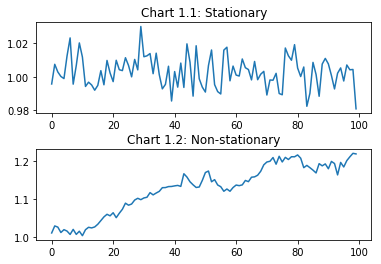

In [10]:
#Random walk
plt.subplots_adjust(hspace = 0.4)
plt.subplot(2,1,1)
white_noise = np.random.normal(loc=.001, scale=.01, size=100)+1
plt.title('Chart 1.1: Stationary')
plt.plot(white_noise)
#Random walk with drift
plt.subplot(2,1,2)
drift = np.random.normal(loc=.001, scale=.01, size=100)+1
drift = np.cumprod(drift)
plt.title("Chart 1.2: Non-stationary")
plt.plot(drift)
plt.show()

### 3.7.1 Python example: Variance stationarity

#### Chart 3.1: variance is nearly constant for random walk, but not for a random walk with a drift

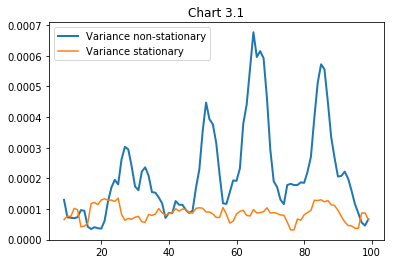

In [19]:
plt.title('Chart 3.1')
plt.plot(pd.DataFrame(drift1).rolling(10).var(), label='Variance non-stationary', linewidth=2)
plt.plot(pd.DataFrame(white_noise).rolling(10).var(), label='Variance stationary')
plt.legend(loc='best')
plt.show()

### 3.7.2 Python example: Co-variance non-stationary

#### Chart 2.1: visualize why it is necessary for stationarity to get constant beta in linear regression

$y_t = \alpha + \beta x_t + \epsilon_t$

- Chart 2.1 shows that difference between two series is changing
    - Thus $\beta$ is not a reliable estimate of the relationship
- Chart 2.2 shows that difference between two series is constnat
    - Thus $\beta$ is a reliable estimate of the relationship


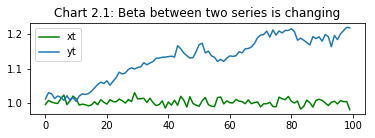

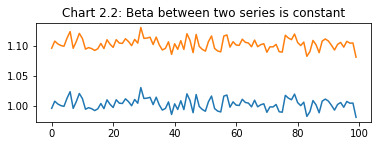

In [11]:
plt.subplots_adjust(hspace = 0.4)
plt.subplot(2,1,1)
plt.title("Chart 2.1: Beta between two series is not constant")
plt.plot(white_noise, color='green', label='xt')
plt.plot(drift, label= 'yt')
plt.legend(loc='best')
plt.show()
plt.subplot(2,1,2)
plt.title("Chart 2.2: Beta between two series is constant")
plt.plot(white_noise, label= 'yt')
plt.plot(white_noise+.1, label= 'xt')
plt.show()

### 3.7.3 Python example: covariance stationarity

Covariance stationary:
$Cov(x_t, x_{t+h}) = F(h) \neq g(t)$

NOT Covariance stationary:
$Cov(x_t, x_{t+h}) = g(t)$

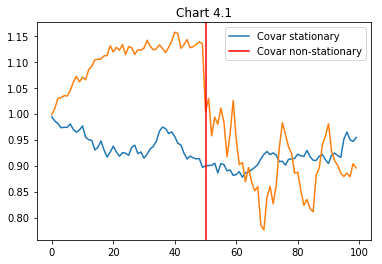

In [21]:
fig, ax = plt.subplots()
drift1 = np.cumprod(np.random.normal(loc=.001, scale=.01, size=100)+1)
plt.plot(drift1, label='Covar stationary')
drift2 = np.concatenate([(np.cumprod(np.random.normal(loc=.001, scale=.01, size=50)+1)), (np.cumprod(np.random.normal(loc=.001, scale=.04, size=50)+1))])
plt.plot(drift2)
ax.axvline(50, color='red', label='Covar non-stationary')
plt.title('Chart 4.1')
plt.legend()
plt.show()

# 4. ARMA Processes

## 4.1 Autocorrelation 

#### Autocovariance of series
$$\gamma_j=cov(x_t,x_{t-j})$$

Review:
$$Cov(x_t,x_{t-j})= E(x_t-E(x_t))(x_{t-j}-E(x_{t-j}))$$

Note: $\gamma_j=var(x_t)$

#### Autocovariance coefficient at lag K:
$$\gamma(k) =cov[x(t), x(t+k)]$$

- Autocovariance function
$\gamma(k)$ is called the autocovariance function and is often abbreviated acvf.

Since var $X(t+k) = \sigma^2 = \gamma(0)$ the autocorrelation coefficient p(k) at lag k is the autocorrelation function, often abbreviated as acf

#### Autocorrelation function:
$$p(k) = \frac{\gamma(k)}{var(x_t)} = \frac{\gamma(k)}{\gamma(0)}$$


- "Autocovariances and autocorrelations are one obvious way of characterizing the joint distribution of a time series so produced. The correlation of xt with xt+1 is an obvious measure of how persistent the time series is, or how strong is the tendency for a high observation today to be followed by a high observation tomorrow (Cochrane 2005, pg.22)."
- "If two processes have the same autocovariance function, they are the same process (Cochrane 2005, pg.26)."

Cochrane, John H. ["Time series for macroeconomics and finance."](http://econ.lse.ac.uk/staff/wdenhaan/teach/cochrane.pdf) University of Chicago (2005): 1-136.



### 4.1.1 Python example: autocorrelation function

Autocorrelation array:[ 1.          0.09580475 -0.08918792]


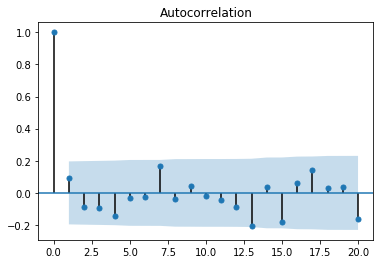

In [13]:
# Simulate data
x = np.random.randint(10,size=100)
# Compute the acf array of random x
acf_array = acf(x)
print('Autocorrelation array:{}'.format(acf_array[:3]))
plot_acf(x, lags=20, alpha=.05)
plt.show()

## 4.2 White noise

Also known as a "purely random process."

A descrete process $\{x_t\}$ consisting of iid random variables with a constant mean and constant variance:
- $E(\varepsilon_t)=0$
- $E(\varepsilon_t^2) =\sigma^2$

And $\varepsilon$ are uncorrelated across time:

- $E(\varepsilon_t\varepsilon_\tau) = 0$ for $t\neq\tau$


A process satisfying the above is a white noise process.

#### The acvf: $\gamma(k) =cov(x(t), x(t+k)) = 0$

#### The acf: $\gamma(k) =
\begin{cases}1& k=0\\0& k \neq 0\\\end{cases}$


#### Intuition behind WN: 
We cannot forecast future observations based on the past - autocorrelations at all lags are zero.


### 4.2.1 Python example: White noise

Generating white noise: np.random.normal()
- 1000 random normal returns 
- Mean 2% (0.02)
- Standard deviation 5% (0.05), 


The mean is 0.020 and the standard deviation is 0.050


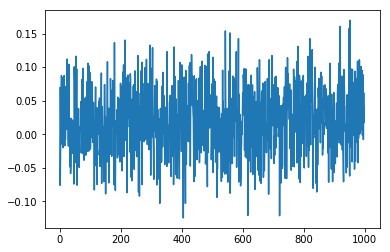

In [14]:
# Simulate wite noise returns
# loc = mean, scale= standard deviation
white_noise = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(white_noise)
std = np.std(white_noise)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(white_noise)
plt.show()

### 4.2.2 Python example: ACF for white noise

- Note there is no autocorrelation in the series

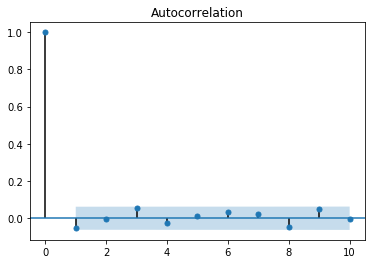

In [15]:
plot_acf(white_noise, lags=10)
plt.show()

## 4.3 Moving average process (MA)

### MA (1) process:
$$y_{t}=\varepsilon_{t}+\theta\varepsilon_{t-1}, \\ \varepsilon~iid(o,\sigma^2)\tag{3.3.1}$$

- Where $y_t$ is constructed from a weighted sum of the two most recent values of $\varepsilon$

##### Mean MA(1):
$E[y_t] = \mu + E(\varepsilon_{t})+\theta E(\varepsilon_{t-1})=\mu, \tag{3.3.2}$

##### Variance  MA(1):
$E(y_t-\mu)^2 = E(\varepsilon_{t} +\theta\varepsilon_{t-1})^2 \\
=E(\varepsilon^2_t+2\theta\varepsilon_t\varepsilon_{t-1}+\theta^2\varepsilon^2_{t-1}\\
=\sigma^2+0+\theta^2\sigma^2 \\
= (1+\theta^2)\sigma^2\tag{3.3.2}$

##### Autocoveriance  MA(1):
$E(y_t-\mu)(y_{t-1}-\mu) = E(\varepsilon_{t} +\theta\varepsilon_{t-1})(\varepsilon_{t-1} +\theta\varepsilon_{t-2}) \\
=0+\theta\sigma^2+0+0 \\
= \theta\sigma^2 \tag{3.3.4}$


- MA(1) Mean and autocovariances are not functions of time thus the process is erogodic for all moments. 

##### Autocorrelation function  MA(1):
Remember autocorrelation is:

$p_j \equiv \gamma_j/\gamma_0$

$p_1 = \frac{\theta\sigma^2}{(1+\theta^2)\sigma^2} \tag{3.3.7}$

Hamilton, J. D., Chapter 3. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896) *Princeton University.*


### MA(2)

$x_t=\varepsilon+\theta\varepsilon_{t-1}+\theta\varepsilon_{t-2}$

Variance MA(2):
$$\gamma_0= \theta_2\sigma^2$$

Autocovariance MA(2):
$$\gamma_1= (\theta_1+\theta_1\theta_2)\sigma^2$$
$$\gamma_2= \theta_2\sigma^2$$

Autocorrelation MA(2):
$$p_1 = \frac{\theta_1+\theta_1\theta_2}{1+\theta_1^2+\theta_2^2}$$
$$p_2 = \frac{\theta_2}{1+\theta_1^2+\theta_2^2}$$

Reference: Cochrane, John H. ["Time series for macroeconomics and finance."](http://econ.lse.ac.uk/staff/wdenhaan/teach/cochrane.pdf) University of Chicago (2005): 1-136.


### 4.3.1 Python example: Autocovariance, autocorrelation MA(1)

In [56]:
ar1 = np.array([1])
ma1 = np.array([1, -0.9])

print('Autocorrelation of MA(1): {:.4f}'.format(ArmaProcess(ar1, ma1).acf()[1]))
print('Autocovariance of MA(1): {}'.format(ArmaProcess(ar1, ma1).acovf()[:2]))
print('Impulse response of MA(1): {}'.format(ArmaProcess(ar1, ma1).impulse_response()[:2]))

Autocorrelation of MA(1): -0.4972
Autocovariance of MA(1): [ 1.81 -0.9 ]
Impulse response of MA(1): [ 1.  -0.9]


### Intuition of MA(1):

$\Delta\text{Lemonade sales}_t = \varepsilon-.5\varepsilon_{t-1}$

- $\varepsilon = \Delta\text{temperature}_t$
- Then $\varepsilon>0$

- An MA(1) process is covariance stationary regardless of the value of $\theta$ because the mean and covariances are not functions of time.

If change $\varepsilon=0$
- Then $\Delta\text{Lemonade sales}>0$
- Assuming that change in temp in last period is 0 then there will be increase in demand for lemonade

If $\varepsilon_{t-1} \rightarrow \Delta\text{Lemonade sales}$ will decrease


Reference: Lambert, Ben. [A graduate course in econometrics](https://www.youtube.com/playlist?list=PLwJRxp3blEvaxmHgI2iOzNP6KGLSyd4dz)

###  MA(P) process:

$$y_{t}=\mu+\varepsilon_{t}+\theta_{1}\varepsilon_{t-1}+\theta_{2}\varepsilon_{t-2}+\cdots+\theta_{q}\varepsilon_{t-q}$$

- Where $\varepsilon_{t}$ is white noise. 
- Mean=$\mu$

#### Variance MA(p):

$\gamma_{0} = E\left(y_{t}-\mu\right)^{2}\\
=E(\varepsilon_{t}+\theta_{1}\varepsilon_{t-1}+\theta_{2}\varepsilon_{t-2}+\cdots+\theta_{q}\varepsilon_{t-q})^2 \\
= \sigma^{2}\left(1+\theta_{1}^{2}+\theta_{2}^{2}+\cdots+\theta_{q}^{2}\right) \tag{3.3.9}$

#### Covariance MA(p):

$\gamma_{j} = E(y_{t}-\mu)(y_{t-j}-\mu)\\
=\sigma^{2}(\theta_{j}+\theta_{j+1}\theta_{1}+\theta_{j+2}\theta_{2}+\cdots+\theta_{q}\theta_{q-j}),j\leq q \\=0,j>q \tag{3.3.12}$

 
Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 3. *Princeton University.*

### MA(q) 

Equation MA(q):
$x_t = \theta(L)\varepsilon_t= \sum^{\infty}_{j=0}(\theta_jL^j)\varepsilon_t$

Variance MA(q):
$$\gamma_0 =(\sum^{\infty}_{j=0}\theta^2_j)\sigma^2 $$

Autocovariance MA(q):
$$\gamma_k =\sum^{\infty}_{j=0}\theta_j\theta_{j+k}\sigma^2 $$

Reference: Cochrane, John H. ["Time series for macroeconomics and finance."](http://econ.lse.ac.uk/staff/wdenhaan/teach/cochrane.pdf) University of Chicago (2005): 1-136.

### MA(q) Process:
$$Y_t = \mu +\sum^q_{j=0}\theta_j\varepsilon_{t-j}$$

Where $q\rightarrow \infty$:

$Y_t=\mu \sum^\infty_{j=0}\psi_j\varepsilon_{t-j}= \mu+\psi_0\varepsilon_t+\psi_1\varepsilon_{t-1}+\cdots\tag{3.3.13}$

- Where $\psi$ is the coefficients of the infinite order MA process and $\theta$ for the finite-order MA
- Mean MA(q):$\mu$


This infinite sequence is covariance stationary process if 3.3.14 is square summable:

$\sum^\infty_{j=0}\psi_j^2<\infty\tag{3.3.14}$

Slightly stronger than 3.3.14 is known as absolutely summable:

$\sum^\infty_{j=0}|\psi_j|<\infty\tag{3.3.15}$

#### Variance MA(q):

$\gamma_0= \left(\psi_j\psi_0+\psi_{j+1}\psi_1+\cdots\right) \tag{3.3.9}$

#### Covariance MA(q): 

$\gamma_{j} = \sigma^{2}(\psi_j\psi_0+\psi_{j+1}\psi_1+\cdots) \tag{3.3.12}$

Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 3. *Princeton University.*

### 4.3.2 Python example: ACF of MA (1)
- For an MA(1) process with θ=−0.9, the array representing the MA parameters is: np.array([1, -0.9])
- The lag-1 autocorrelation for an MA(1) model is not θ, but rather θ/(1+θ2). 
    - For example, if the MA parameter, θ, is = +0.9: 
        - The first-lag autocorrelation: 0.9/(1+(0.9)2)=0.497
        - Autocorrelation at all other lags will be zero. 

- If the MA parameter, θ, is -0.9, the first-lag autocorrelation will be −0.9/(1+(−0.9)2)=−0.497.

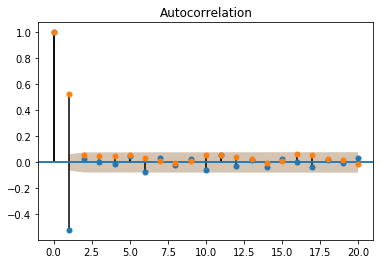

In [11]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
#MA(1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
ma_sim1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)
# MA(1)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
ma_sim2 = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

fig, ax = plt.subplots()

# Plot 1: MA parameter = -0.9
plot_acf(ma_sim1, lags=20, ax=ax)
# Plot 2: MA parameter = 0.9
plot_acf(ma_sim2, lags=20, ax=ax)
plt.show()

### 4.3.3 Python example: Estimating an MA model

In [8]:
# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
# Print out the estimate for the constant and for phi
print("When the true theta=-0.9, the estimate of theta is: {}".format(res.params[1]))

When the true theta=-0.9, the estimate of theta is: -0.884641115387593


## 4.4 Autoregresive Process (AR)

### AR (1)


AR1:
$(1-\theta L)x_t=\varepsilon_t \rightarrow x_t=(1-\phi L)^{-1}\varepsilon_t=\sum^{\infty}_{j=0}\phi^j\varepsilon_{t-j}$

Variance AR(1): 
- $p_0=1$
$$\gamma_0 = (\sum^{\infty}_{j=0}\phi^{2j})\sigma^2\\
=\frac{1}{1-\phi^2}\sigma^2$$

Autocovariance, Autocorrleation? AR(1): 
- $p_1=\phi$
$$\gamma_1 = (\sum^{\infty}_{j=0}\phi^{j}\phi^{j+1})\sigma^2=\phi(\sum^{\infty}_{j=0}\phi^{2j})\sigma^2\\
=\frac{\phi}{1-\phi^2}\sigma^2$$

- $p_k=\phi^k$
$$\gamma_k= \frac{\phi^k}{1-\phi^2}\sigma^2$$

There is another way to find autocorrelations of AR(1)

$\gamma_1 = E(x_tx_{t-1})=E\Big((\phi x_{t-1}+\varepsilon_t)(x_{t-1})\Big)= \phi\sigma^2_x, \ \ p_1=\phi$

$\gamma_2 = E(x_tx_{t-2})=E\Big((\phi^2 x_{t-2}+\phi\varepsilon_{t-1}+\varepsilon_t)(x_{t-2})\Big)= \phi^2\sigma^2_x, \ \ p_2=\phi^2$

$\gamma_k = E(x_tx_{t-1})=E\Big((\phi^k x_{t-k}+\varepsilon)(x_{t-k})\Big)= \phi^k\sigma^2_x, \ \ p_k=\phi^k$

Reference: Cochrane, John H. ["Time series for macroeconomics and finance."](http://econ.lse.ac.uk/staff/wdenhaan/teach/cochrane.pdf) University of Chicago (2005): 1-136.

### AR(P) Yule-Walker 

#### Showing that autocorrelations eventually die out exponentially

$x_t= \phi_1x_{t-1}+\phi_2x_{t-2}+\phi_3x_{t-3}+\varepsilon_t$

- Multiply both sdies by $x_t, x_{t-1}$, take expectations, divide by $\gamma_0$

$1 = \phi_1p_1+ \phi_2p_2+\phi_3p_3+\sigma^2/\gamma_0\\
p_1 = \phi_1+ \phi_2p_1+\phi_3p_2\\
p_2 = \phi_1p_1+ \phi_2+\phi_3p_1\\
p_3 = \phi_1p_2+ \phi_2p_1+\phi_3\\
p_k = \phi_1p_{k-1}+ \phi_2p_{k-2}+\phi_3p_{k-3}$

The first equation can be solved for the variance:

$$\sigma^2_x=\gamma_0=\frac{\sigma^2_\varepsilon}{1-(\phi_1p_1+\phi_2p_2+\phi_3p_3)}$$

- "The pattern of autocorrelations as a function of lag – ρj as a function of j – is called the autocorrelation function. The MA(q) process has q (potentially) non-zero autocorrelations, and the rest are zero. The AR(p) process has p (potentially) non-zero autocorrelations with no particular pattern, and then the autocorrelation function dies off as a mixture of sines and exponentials (Cocharane 2004, pg. 26)."

Reference: Cochrane, John H. ["Time series for macroeconomics and finance."](http://econ.lse.ac.uk/staff/wdenhaan/teach/cochrane.pdf) University of Chicago (2005): 1-136.

### AR(1) process:

$Y_t = c+ \phi Y_{t-1} + \varepsilon , \\ \varepsilon_t - iid(0,\sigma^2) \tag{3.4.1}$

- $\varepsilon_t$ is a white noise process
- 3.4.1 is a first-order difference equation as we saw earlier in [(1.1.1)](#recursive)
- If $|\theta|>1$ there does not exist a covariance-stationary process for $Y_t$

##### Mean AR(1):
$\gamma_0= E[y_t] = \frac{c}{1-\phi} \tag{3.4.3}$

##### Variance AR(1):
$\gamma_1= E(y_t-\mu)^2 = E(\varepsilon_{t} +\phi\varepsilon_{t-1}\phi^2\varepsilon_{t-2}+\cdots)^2 \\
=\frac{\sigma^2}{1-\phi^2}\tag{3.4.4}$

##### Autocoveriance AR(1): 
$E(y_t-\mu)(y_{t-j}-\mu) = \Big[\frac{\phi^j}{1-\phi^2}\Big]\sigma^2\tag{3.3.5}$


##### Autocorrelation function AR(1):
$p_1 = \frac{\gamma_j}{\gamma_0}= \phi^j \tag{3.4.6}$

- Note the autocorrelation of AR(1) 3.4.6 is indentical to the dynamic multiplier (impulse-response function) we saw in [(1.1.10)](#dynamic-multiplier1)
- "The effect of a one-unit increase in $\varepsilon_t$ on $Y_{t=j}$ is equal to the correlation between $Y_t$ and $Y_{t+j}$ (Hamilton 1994)"

Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 3. *Princeton University.*

### 4.4.1 Python example: Autocovariance, autocorrelation AR(1)

In [70]:
# Simulate AR(2) with phi1=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])

print('Autocorrelation of AR(1): {:.4f}'.format(ArmaProcess(ar, ma).acf()[1]))
print('Autocovariance of AR(1): {}'.format(ArmaProcess(ar, ma).acovf()[:5]))
print('Impulse response of AR(1): {}'.format(ArmaProcess(ar, ma).impulse_response()[:5]))

Autocorrelation of AR(1): 0.6000
Autocovariance of AR(1): [1.5625 0.9375 0.5625 0.3375 0.2025]
Impulse response of AR(1): [1.     0.6    0.36   0.216  0.1296]


### AR(2) process:
$Y_t = c+ \phi Y_{t-1} + \phi_2Y_{t-2} \varepsilon \tag{3.4.16}$

Lag operator notation
$(1-\phi_1L-\phi_2L^2)Y_t = c+\varepsilon \tag{3.4.17}$

Where 3.4.16 is stable if roots:
$(1-\phi_1z-\phi_2z^2)=0\tag{3.4.18}$

##### Mean AR(2):
$\gamma_0= \frac{c}{1-\phi_1-\phi_2} \tag{3.4.23}$

##### Variance AR(2): 
$\gamma_0 = \phi_1\gamma_1+\phi_2\gamma_2+\sigma^2\tag{3.4.29}$


Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 3. *Princeton University.*

### 4.4.2 Python example: Autocovariance, autocorrelation AR(2)

In [71]:
# Simulate AR(2) with phi1=+0.6
ma = np.array([1])
ar = np.array([1, -0.6,-.02])

print('Autocorrelation of AR(1): {:.4f}'.format(ArmaProcess(ar, ma).acf()[1]))
print('Autocovariance of AR(1): {}'.format(ArmaProcess(ar, ma).acovf()[:5]))
print('Impulse response of AR(1): {}'.format(ArmaProcess(ar, ma).impulse_response()[:5]))

Autocorrelation of AR(1): 0.6122
Autocovariance of AR(1): [1.60024036 0.979739   0.61984821 0.3915037  0.24729919]
Impulse response of AR(1): [1.     0.6    0.38   0.24   0.1516]


#### AR(P) process:



$$y_{t}=c+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}+\varepsilon_{t} \tag{3.4.31}$$

- Mean: 

$$\phi_{1}(y_{t-1}-\mu)+\phi_{2}(y_{t-2}-\mu)+...+\phi_{p}(y_{t-p}-\mu)+\varepsilon_{t}$$

- Variance: 
$$\gamma_{0}=\phi_{1}\gamma_{1}+\phi_{2}\gamma_{2}+...+\phi_{p}\gamma_{p}+\sigma^{2}$$


Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 3. *Princeton University.*

### AR (P) stationarity and weak dependence

#### 1. $E[x_t]$

$= p^t E[x_0] +  \sum_{i=0}^{t-1} P^i E[\varepsilon_{t-i}] \\
= E[x_0]=0 \ \ \text{then} \ \ E[x_t]=0$

#### 2. $Var(x_t)$

$= P^ 2 Var(x_{t-1})+ var(\varepsilon_t) \\ 
var(x_t)= p^2 var(x_t) + \sigma^2\\
= (1-p^2) var(x_t) = \sigma^2 \\
= var(x_t) = \frac{\sigma^2}{1-p^2}$

#### 3. $Covar(x_t, x_{t+h})= f(h) \neq f(t)$
1. $x_{t}= p x_{t-1} + \varepsilon_t, \ \ \ \varepsilon-(0, \sigma^2)\\
=P[Px_{t-2}+\varepsilon_{t-1}+\varepsilon_t] \\
=P^2x_{t-2}+p\varepsilon_{t-1}+\varepsilon_t \\ 
= p^tx_0 + \sum_{i=0}^{t-1} \varepsilon_{t-1}
$


2. $x_{t+h} = p^h x_t + \sum_{i=0}^{t-1} p^i\varepsilon_{t+h-i}$

Using 1. & 2.
$Covar(x_t, x_{t-h}) = Covar(x_t, p^h x_t + \sum_{i=0}^{t-1} p^i\varepsilon_{t+h-i})\\
= p^hcov(x_t,x_t) \\
=p^h var(x_t) \\
\frac{p^h\sigma^2}{1-p^2}$

|p|<1 in order to have finite covariance

Refrence: Lambert, Ben. [A graduate course in econometrics](https://www.youtube.com/playlist?list=PLwJRxp3blEvaxmHgI2iOzNP6KGLSyd4dz)

### 4.4.3 Python Example: ACF of AR(1) 

AR(1) time series has parameter ϕ 
The sign of the other coefficients is opposite of MA

For example, for an AR(1) process with ϕ=0.9 the input is np.array([1, -0.9])

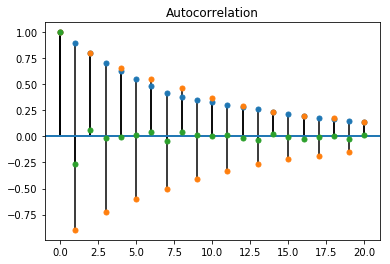

In [23]:
#AR(1) process with ϕ=0.9 AR parameters would be ar = np.array([1, -0.9])
#AR(1) process with ϕ=-0.9 AR parameters would be ar = np.array([1, 0.9])
#AR(1) process with ϕ=-0.3 AR parameters would be ar = np.array([1, 0.3])

ars = [-.9, .9, .3]
fig, ax = plt.subplots()
for idx, ar in enumerate(ars):
    ar1 = np.array([1, ar])
    ma1 = np.array([1])
    AR_object = ArmaProcess(ar1, ma1)
    graphs = AR_object.generate_sample(nsample=1000)
    #plt.plot(graphs, label=str(ar))
    #plt.legend(loc='best')
    plot_acf(graphs, lags=20, ax=ax, label=str(ars))

### 4.4.4 Python example: Estimating AR(1)

Estimate $\phi$ using statsmodels

In [6]:
ar1 = np.array([1, -.6]) #Phi 0.6
ma1 = np.array([1])
AR_object = ArmaProcess(ar1, ma1)
ar_simulated = AR_object.generate_sample(nsample=1000)
mod = ARMA(ar_simulated, order=(1,0))
res = mod.fit()

print("When the true phi=0.6, the estimate of phi is: {:.3f}".format(res.params[1]))

When the true phi=0.6, the estimate of phi is: 0.609


## 4.5 Mixed autoregressive moving average processes

$y_{t}=c+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}+\varepsilon_{t}+\theta_1 \varepsilon_{t-1}+\theta_2\varepsilon_{t-2}+\cdots +\theta_q\varepsilon_{t-q}\tag{3.5.1}$

Written in lag operator from:

$(1-\phi_1L-\phi_2L^2-\cdots2\phi_pL^p)y_t= c+ (1+\theta_1L-\theta_2L^2-\cdots2\phi_pL^q)\varepsilon_t\tag{3.5.2}$

Provided that the roots of 3.5.2 equal 0:

$1-\phi_1L-\phi_2L^2-\cdots2\phi_pL^p=0\tag{3.5.3}$

Provided both sides of 3.5.2 can be divided by:  $(1-\phi_1L-\phi_2L^2-\cdots2\phi_pL^p)$

$$y_t=\mu+\Phi (L)\varepsilon_t$$

Where:

$$\Phi(L)= \frac{(1+\theta_1L-\theta_2L^2-\cdots2\phi_pL^q)}{(1-\phi_1L-\phi_2L^2-\cdots2\phi_pL^p)}\\
\sum|\Phi_j|<\infty\\
\mu=\frac{c}{1-\phi_1-\phi_2-\cdots-\phi_p}$$

- Thus the stationary of an ARMA process depends on the autoregressive $\phi$ paremeters and not on the MA parameters($\theta$)

## 4.6 Autocovariance generating function

Autocovariance generating function:

$g_Y = \sum^{\infty}_{j=-\infty}\gamma_jz^j\tag{3.6.1}$

- Where z is taken to be a complex scalar
- "Of particular interest as an argument for the autocovariance generating function is any value of z that lies on the complex unit circle
    - $z=cos(\omega)-i \sin(\omega)=e^{-i\omega}$
    - Where $i=\sqrt{-1} \text{and} \omega$ is the radian that z makes with the real axis. 
    - The autocovariance genrating fucntion is evaluated at $z= e^{-i\omega}$ and divided by $2\pi$
    - The resulting function:
$S_Y(\omega)= \frac{1}{2\pi}G_Y(e^{-i\omega})= \frac{1}{2\pi}\sum^{\infty}_{j=-\infty}\gamma_j(e^{-i\omega j})\tag{population spectrum of Y}$

- $S_Y(\omega)$ can be used to calculate all of the autocovariances.

#### Example:

MA(1) autocovariance genrating function:

$G_y(z) = [\theta\sigma^2]z^{-1}+[1+\theta^2)\sigma^2]z_0+[\theta\sigma^2]z^{1=\sigma^2[\theta^{-1}+(1+\theta^2)+\theta z]}$

-This can be rewritten: 

$g_y=\sigma^2(1+\theta z)(1+\theta z^{-1})\tag{3.6.2}$

This expression can be calculated by an autocovariance funtion:

$g_y(z)= \sigma^2(1+\theta_1z+\theta_2z^2+\cdots+\theta_qZ^q)\times(1+\theta_1z^{-1}+\theta_2z^{-2}+\cdots+\theta_qz^{-q})\tag{3.6.3}$
 

### Filters
- Finding the effects of filtering on autocovariances

Suppose we have MA(1) $y_t=(1+\theta L)\varepsilon_t\tag{3.6.11}$

The autocavariance generating function represents the change in $y_t$ over its value the previous period. Thus the observed data can be characterized as an MA(2) process:

Which can be written:

$g_x(z)=\sigma^2(1-z)(1+\theta z)(1-z^{-1})(1+\theta z^{-1})\\
=(1-z)(1-z^-1)g_y(z)\tag{3.6.15}$





## 4.7 Invertibility 

MA(1) process:

$Y_t-\mu = (1+\theta L)\varepsilon_t\tag{3.7.1}$

If $\theta$<1:

$(1-\theta L+\theta^2L+^2-\theta^3L^3+\cdots)(y_t-\mu)=\varepsilon\tag{3.7.2}$

3.7.2 can also be interpreted as a AR($\infty$) process. If 3.7.1 can be rewritten as an AR($\infty$) then the moving average is said to be invertible. 

- For every MA(1) process we can find a second noninvertible MA(1) process with the same first and second momemnts. Conversely any noninvetible representation $|\tilde \theta|>1$ there exists an invertible represntation $\theta=(1/\tilde\theta). 
- When $\theta$+-1 then it is noninvertible


Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 3. *Princeton University.*

## 4.8 Review of AR, MA, ARMA:


Autoregressive (AR)

$$AR(1): y_t = pyt−1 + e_t , |p| < 1 (1 − pL)y_t = et$$

$$AR(p): a(L)y_t = e_t, \text{where a(L) is order p}$$

Moving average (MA)

$$MA(1): y_t = e_t + \theta e_t−1$$
$$yt = (1 + \theta L)\theta et$$
$$MA(q): y_t = b(L)e_t, \text{where b(L) is order q}$$

ARMA
$$ARMA(p, q): a(L)y_t = b(L)e_t$$

- Where a(L) is order p and b(l) is order q


- Any MA process with roots outside unit circle can be written as AR($\infty$), such processes called invertible. If yt = b(L)et ia an invertible MA process, then et = b(L)−1yt. That is, the “errors” are laying in a space of observations and can be recovered from y’s (another name for this: errors are fundamental).


Reference: Mikusheva, Anna [Time Series Analysis](https://ocw.mit.edu/courses/economics/14-384-time-series-analysis-fall-2013/).

### Comparing AR(1) vs. MA(1)

##### Check the covariance structure

MA(1): 
- $Cov(x_t, x_{t+h}) = \theta\sigma, h=1$
- $Var(x_t)= \sigma^2(1+\theta^2)$

##### Corrleation of MA(1):
$Corr(x_t, x_{t+h})= \frac{\theta\sigma^2}{\sigma^2(1+\theta^2)}$

##### Corrleation of AR(1) :
Corr$(x_t, x_{t+h})= p^h$

We can't tell whether a process is MA1 or AR1 because both have constant mean and variance. Instead we can look to the correlation structure to bare out this difference.

MA(1) $\gamma^h = \frac{\theta\sigma^2}{\sigma^2(1+\theta^2)}$

AR(1) $\gamma^h= p^h$

Reference: Lambert, Ben. [A graduate course in econometrics](https://www.youtube.com/playlist?list=PLwJRxp3blEvaxmHgI2iOzNP6KGLSyd4dz)

### AR(1) to MA($\infty$)

$AR(1) =\phi x_{t-1}=\varepsilon_t\\
= (1-\phi L)x_t=\varepsilon_t$

Now invert:

$x_t = (1-\phi L)^{-1} \varepsilon_t$

Inverted term:

$(1-\phi L)^{-1} = (1+\phi L+\phi^2L^2+\cdots)\varepsilon_t\\
=\sum^{\infty}_{j=0}\phi^j \varepsilon_{t-j}$

Cochrane, John H. ["Time series for macroeconomics and finance."](http://econ.lse.ac.uk/staff/wdenhaan/teach/cochrane.pdf) University of Chicago (2005): 1-136.

### 4.8.1 Python example: Comparing AR & MA

[]

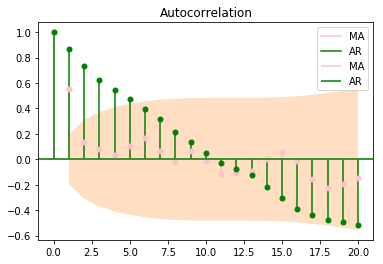

In [24]:
# Plot 2: MA parameter = +0.9
fig, ax = plt.subplots()
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
ma = ArmaProcess(ar2, ma2).generate_sample(nsample=100)
plot_acf(ma, alpha=1, lags=20, ax=ax, label='MA', color='pink')

ar2 = np.array([1,-.9])
ma2 = np.array([1])
ar = ArmaProcess(ar2, ma2).generate_sample(nsample=100)
plot_acf(ar, lags=20, ax=ax, label='AR', color='green')
plt.legend(loc='best')
plt.plot()

# 5. Non-stationary Models
Reference: Unless otherwise noted, equations from "5. Non-stationary models" via Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 5. *Princeton University.*


## 5.1 Introduction

### Deterministic trend (Trend stationary):
$y_t= \alpha + \delta t + \psi(L)\epsilon_t \tag{15.1.2}$


### Unit root:
$(1-L)y_t= \delta+ \psi(L)\epsilon_t \tag{15.1.3}$

- Subtracting the trend $\alpha + \delta$ from equation 15.1.2
- Also known as integrated order 1 process
- One of the roots or eigenvalues of the autoregresssive polynomial is unity and all other eigenvalues are inside the unit circle

- Note: the first-difference operator (1-L) can also be written using $\Delta$
    - $\Delta y_t \equiv y_t - y_{t-1}$

#### The example of a unit root process is obtained by setting $\psi(L)$ = 1 in equation 15.1.2:
$y_t= y_{t-1} + \delta + \epsilon_t \tag{15.1.4}$

- Equation 15.1.4 is known as random walk with a drift of $\delta$


## 5.2 Linear time trends & unit roots

- Many economists assume that growth is of exponential form and thus take natural log of exponential trend 
- The result is a linear trend:
$$log(y_t)=\delta t$$


- The first difference log of a variable will also yield a percentage change:
$$(1-L)log(y_t) = log(\frac{y_t}{y_{t-1}})$$
$$\approx \frac{y_t-y_{t-1}}{y_{t-1}}$$


### 5.2 Python example: Unit root, first difference, log

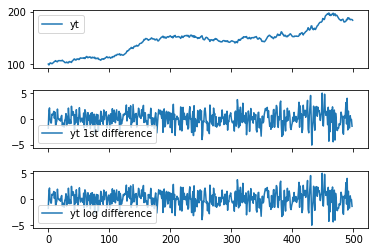

In [102]:
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True)
plt.subplots_adjust(hspace = 0.4)
rw_drift1 = 100 * np.cumprod(np.random.normal(loc=.001, scale=.01, size=500) + 1)
ax1.plot(rw_drift1, label= 'yt')
ax2.plot(np.diff(rw_drift1), label= 'yt 1st difference')
ax3.plot(np.diff(rw_drift1), label= 'yt log difference')
for a in [ax1,ax2, ax3]:
    a.legend(loc='best')

plt.show()

## 5.3 Comparison of dynamic multipliers:

Examine the trend stationary 15.1.2 process ($y_t= \alpha + \delta t + \psi(L)\epsilon_t$).

- The dynamic multiplier is:

$$\frac{\partial y_{t+s}}{\partial\varepsilon_t}=\psi_s$$

- For trend-stationary the effect of a stochastic disturbance wears off:

$$\underset{s\rightarrow\infty}{lim} \frac{\partial y_{t+s}}{\partial\varepsilon_t}=0$$

- However for a unit root process this is not the case. From 15.3.4 the effect of $\varepsilon$ on $y_{t+s}$

$$\frac{\partial y_{t+s}}{\partial\varepsilon_t}=\frac{\partial y_t}{\partial\varepsilon_t}\psi_s+\psi_{s-1+\cdots+\psi_1}$$

- Instead a shock of $\varepsilon$ has a permanent effect on the level of y

$$\underset{s\rightarrow\infty}{lim} \frac{\partial y_{t+s}}{\partial\varepsilon_t}=1+\psi_1+psi_2+\cdots=\psi(1)$$

#### $\underline{IMPORTANT}$: 
- If a process is trend stationary (15.1.2) $y_t= \alpha + \delta t + \psi(L)\epsilon_t$ 
    - The appropriate response is to subract $\delta t$ from $y_t$ to produce stationary representation
- By contrast if the process is generated by a unit root $(1-L)y_t= \delta+ \psi(L)\epsilon_t$
    - Subracting $\delta t$ from $y_t$ would succeed in removing the time dependence of the mean but not the variance
    - For a unit root process you must difference the series as in 15.1.3
  



## 5.4 The meaning of unit roots
- Nelson and Plosser (1982) argue that many economic series are better characterized by unit roots than by deterministic time trends.

## 5.5 Other approaches to trended series

- Fractional integration
- Occasional breaks in trend

## 5.6 Random walks

### 5.6.1 RW "Deterministic" vs. RW with drift "Stochastic" trend

- If we take into account the deterministic trend we can transform the deterministic trend series into a stationary series 
- However, if there is a stochastic trend (RW with a drift), we cannot convert to stationary series

Random walk--"Deterministic trend":

$$x_t = \alpha + x_{t}+\varepsilon_t, \varepsilon~iid(0,\sigma^2)$$

$E[x_t] = \alpha t\\
Var(x_t) = \sigma^2$

Random walk with drift--"Stochastic trend":

$$x_t = \alpha + x_{t-1}+\varepsilon_t, \varepsilon~iid(0,\sigma^2)$$

$E[x_t] = \alpha t\\
Var(x_t) = t\sigma^2$

### 5.6.2 Simple random walk

Random walk, also known as difference stationary:

$$X_t = X_{t-1}+ \varepsilon_t$$

- Where $\varepsilon$ is random with mean $\mu$, var $\sigma^2$

Assuming $x_0=0$:

$x_1 = \varepsilon_1$
$x_2 = x_1 + \varepsilon_2$ = $\varepsilon_1+\varepsilon_2$

Using succesive substiution:

$$x_t = \sum_{i=1}^t \varepsilon_t$$

Thus $E(x_t) = t\mu,\ \  var(x_t) = t\sigma^2$

Reference: Lambert, Ben. [A graduate course in econometrics](https://www.youtube.com/playlist?list=PLwJRxp3blEvaxmHgI2iOzNP6KGLSyd4dz)

### 5.6.3 Python example: Random walk

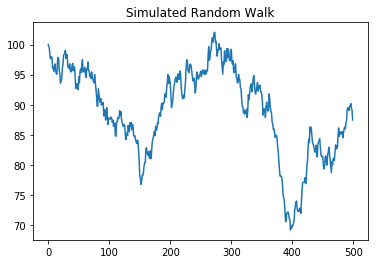

In [16]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1.0, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0
# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### 5.6.4 Python example: ACF of random walk

- Note the presence of autocorrelation in the series

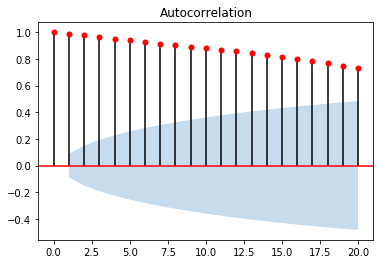

In [17]:
plot_acf(P, lags=20, color='red')
plt.show()

### 5.6.5 Python example: Random walk with a drift

- Referred to as "random walk with a drift" or "time series with Stochastic trend"

δ: 0.332


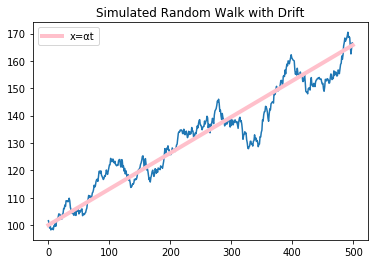

In [86]:
# Simulate the stock price, P, by taking the cumulative product
rw_drift = 100 * np.cumprod(np.random.normal(loc=.001, scale=.01, size=500) + 1)


# Plot the simulated stock prices
plt.plot(rw_drift)
plt.title("Simulated Random Walk with Drift")

plt.plot(np.linspace(start=100, stop=rw_drift[-1], num=500), linewidth=4, color='pink', label='x=αt')
print('δ: {:.3f}'.format(rw_drift[-1]/500))

plt.legend()
plt.show()

### 5.6.6 RW with drift (AR1 when |p|=1)

#### 1. $E[x_t]$

$= E[x_0] +  \sum_{i=0}^{t-1} E[\varepsilon_{t-i}] \\
= E[x_0]=0 \ \ \text{then} \ \ E[x_t]=0$


#### 2. $Var(x_t)$

$=Var(x_{t})+ var(\varepsilon_{t-i})\\
=t\sigma^2$ 

*Note 2: Because the variance is a function of time ($t\sigma^2$) our random walk will not be stationary*

#### 3. $Covar(x_t, x_{t+h})\\
= Covar(x_{t}, x_t+ \sum_{i=0}^{h-1} \varepsilon_{e+h-i})\\
= var(x_t)$

*Note 3: The covariance is also changing with time, thus our random walk will not be stationary*

#### 4. Demonstrate that RW with a drift is not weakly dependent
$Corr(x_t, x_{t+h}) = \frac{Cov(x_t, x_{t+h})}{\sqrt(var(x_t)var(x_{t+h})}\\
=\frac{t\sigma^2}{\sqrt(t\sigma^2(t+h)\sigma^2)}\\
=\frac{t}{\sqrt(t+h)}\\
=\sqrt(\frac{t}{t+h})
$

Remember for conditions for weak dependence:
- $Cov(x_t, x_{t+h}) \rightarrow 0 $
- $h \rightarrow \infty$

- The correlation between $x_t and x_{t+h}$ doesn't go to zero fast enough


Reference: Lambert, Ben. [A graduate course in econometrics](https://www.youtube.com/playlist?list=PLwJRxp3blEvaxmHgI2iOzNP6KGLSyd4dz)


### 5.6.7 Python example:  stationary and non-stationary 

- Stationary (RW--P<1) vs. non-stationary (RW--P=1)

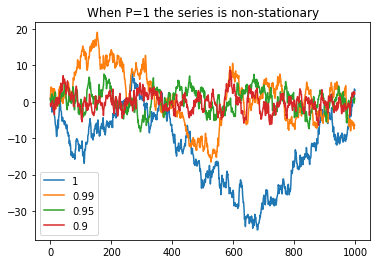

In [73]:
ars = [-1,-.99, -.95, -.9]
fig, ax = plt.subplots()
for idx, ar in enumerate(ars):
    ar1 = np.array([1, ar])
    ma1 = np.array([1])
    AR_object = ArmaProcess(ar1, ma1)
    graphs = AR_object.generate_sample(nsample=1000)
    #plt.plot(graphs, label=str(ar))
    #plt.legend(loc='best')
    plt.plot(graphs,label=str(-ar))
    plt.legend()
    plt.title('When P=1 the series is non-stationary')

# 6. Processes with Deterministic Time Trends


## 6.1 Asymptotic distribution of OLS estimates of simple time trend model

### Review--Stationary explanatory variables:
- Asymptotic distributions for regressions with stationary explanatory variables

$y_t = x_t\prime \beta + \epsilon_t$

Where: 1. $x_t\prime = [1 \ \ t]$   2. $\beta = \begin{pmatrix} \alpha \\ \delta \end{pmatrix}$

1. OLS estimate $\beta$: 

$$\beta = [\sum x_t x_t\prime]^{-1} [\sum x_t y_t]$$


2. Deviation of OLS estimate from true value: 

$$\hat\beta- \beta = [\sum x_t x_t\prime]^{-1} [\sum x_t \epsilon_t]$$


3. Find limiting distribution for regression with stationary explantory variables: 
    - Multiply by $\sqrt{T}$
    
$$\sqrt{T}(\hat\beta- \beta) = [(\frac{1}{T})\sum x_t x_t\prime]^{-1} \ \ [\frac{1}{\sqrt{T}} \sum x_t \epsilon_t]$$

- The assumption $[(\frac{1}{T})\sum x_t x_t\prime]^{-1}$ converges to the singular matrix Q
- Then: $[\frac{1}{\sqrt{T}} \sum x_t \epsilon_t]$ converges to $N(0, \sigma Q)$, 
- But this cannot be used for a deterministic time trend!

### Time series with deterministic trend:

$y_t = \alpha+\beta_t + \mu_t$

= $(\alpha \beta) \begin{pmatrix} 1 \\ t \end{pmatrix} + \mu_t$

Where: 
1. $\theta= \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$
2. $x_t = \begin{pmatrix} 1 \\ t \end{pmatrix}$

$y_t= \theta\prime x_t + \mu_t$

$\hat\theta = (\sum x_t  x_t\prime)^{-1}\sum x_t \ y_t$

Skipped intermediate steps:

== $(x_t  x_t\prime)^{-1}x\prime \mu$

Reference: Unless otherwise noted, equations from "6. Processes with Deterministic Time Trends" via Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896), Chapter 16. *Princeton University.*

# 7. Univariate processes with unit roots


## 7.1 Dickey-Fuller

- If we do not reject the null hypothesis it means we have a non-stationary time series

"The Augmented Dickey Fuller Test runs an regression of the first difference of the time series against a lag of the level values of the time series plus lagged first differences. The test statistic is based on the significance of the lagged level values, not the significance of the overall regression via the F-statistic."

"The test statistic is the t-value of the lag of the level values of the time series. A rough guide to significance would be its associated p-value. However, the reported critical values at the end of the output are more appropriate. These are the adjusted critical values as calculated by MacKinnon for the ADF."
https://stats.stackexchange.com/questions/160637/adf-reject-or-keep-null-hypothesis-difference-p-value-test-statistic

AR(P) process:

$x_t = \alpha + Px_{t-1} + \varepsilon_t$

- Note: 
    - if $\alpha = 0$ then RW
    - if $\alpha \neq$ then RW with drift


- $H_0: P=1$ Stationary 
- $H_1: P<1$ Non-stationary
    - #### If we reject it is non-stationary


$(x_t-x_{t-1}) = \alpha + (P-1)x_{t-1}+\varepsilon_t \\
\Delta x_t = \alpha + \delta x_{t-1} + \varepsilon_t$

- When $P=1 \delta x_{t-1}$ vanishes, meaning LHS and RHS of the equation are both stationary
- T. statistic : $\hat s = \delta$
- Compare $\hat s$, but because X_{t-1} is not stationary it is not normally distributed
- So we use Dickey-Fuller distribution so if t< Dickey fuller distribution then we reject null


## 7.2 Augmented dickey fuller

Remember:

- When $\delta=0$ stationary
- when $\delta<0$ non-stationary

AR(1):
$\Delta y_t = \alpha + \delta y_{t-1} + \varepsilon \\
H_0: \delta=0\\
H_1: \delta<0
$

AR(2):
$\Delta y_t = \alpha + \delta y_{t-1} +\beta\Delta y_{t-1}+ \varepsilon \\
H_0: \delta=0\\
H_1: \delta<0
$

AR(d):
$\Delta y_t = \alpha + \delta y_{t-1} + \sum^h_{i=1}\beta_i\Delta y_{t-i}+ \varepsilon \\
H_0: \delta=0\\
H_1: \delta<0
$

## 7.3 Dickey Fuller test- AR with trend

RW with drift:
- $y_t = \alpha + y_{t-1}+\varepsilon_t$

Trend stationary:
- $\alpha t + \varepsilon_t$
    - When remove linear trend our series becomes stationary
    - $y_t-\alpha t =\varepsilon_t$

$\Delta y_t = \alpha+\delta y_{t-1}+ \gamma t + \varepsilon_t$
- $\gamma$ accounts for time trend
- We calculate ordinary t statistic on \hat \delta and compare to DF-distribution
- But it is slightly different with the time trend.
- The critical values for time trend are even more negative making it that much less likely that we will conclude that we do not have a unit root
- If it looks like our variable increases across time then we should include a time trend

$
H_0: \delta=0\\
H_1: \delta<0$


## 7.3.1 Python example: Dickey fuller

- First apply the Dickey-Fuller test separately to show they are random walks. 

- Apply the test to the difference, which should strongly reject the random walk hypothesis. 

Dickey-fuller p-value: 0.7342
We cannot reject the null hypothesis
Thus this series is NOT stationary


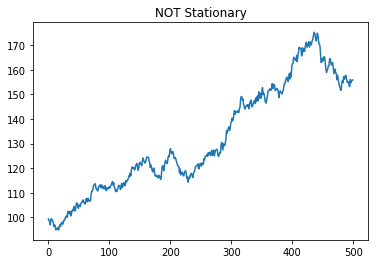

In [82]:
def int_process(array):
    adf = adfuller(array)
    print("Dickey-fuller p-value: {:.4f}".format(adf[1]))
    if adf[1]<.05:
        print('We can reject the null hypothesis')
        print('Thus this series is stationary')
    else:
        print('We cannot reject the null hypothesis')
        print('Thus this series is NOT stationary')
    
    plt.plot(array)
    if adf[1]<.05:
        plt.title('Stationary')
    else:
        plt.title('NOT Stationary')

int_process(rw_drift)

Dickey-fuller p-value: 0.0000
We can reject the null hypothesis
Thus this series is stationary


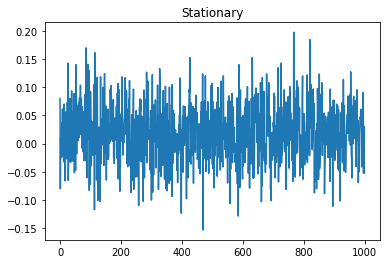

In [80]:
white_noise = np.random.normal(loc=0.02, scale=0.05, size=1000)

## 7.4 Testing order of integration

$y_t - \beta x_t=\varepsilon_t$ Relationship between $y_t$ and $x_t$
- $\varepsilon_t$ should be stationary I(0) & weakly dependent

We don't know the parameter $\beta$

Thus we need to:

LS $\rightarrow y_t=\hat\alpha +\hat\beta x_t +\hat u_t\\
\hat u_t = y_t\hat\alpha=\hat\beta x_t$

- $\hat u_t$ should be an I(0) process;

We check this by running a DF test on $\hat u_t$

$\Delta \hat u_t = \delta_0 + \delta_1 \hat u_{t-1}+/cdots + v_t$

- Calculate T-stat for $\delta_1$ then compare to DF distribution
- If T< DF is less than critical value of DF, we reject null and conclude that our error is I(0)
- In other words if we reject the null we have cointegration between our variables

- Because the T stat is for $\hat\beta$ rather than the true $\beta$, we have to ammend the DF distribution because we are estimating $\beta$.
-  This DF (lets denote as $DF_2$, where our original is $DF_1$) is slightly more stringent than the original DF.\
    - $t<DF_2<DF_1$
- This makes it less likely we reject the null hypothesis which we write below:

$
H_0: \beta=0\\
H_1: \beta\neq0$

- The null is that we have run a spurious regression 
- If $\beta$ is zero it means $y_t$ and $x_t$ are not integrated
- It is only under the case that we reject the null that we potentially have co-integration


Reference: Unless otherwise noted, chapter notes from Lambert, Ben. [A graduate course in econometrics](https://www.youtube.com/playlist?list=PLwJRxp3blEvaxmHgI2iOzNP6KGLSyd4dz)

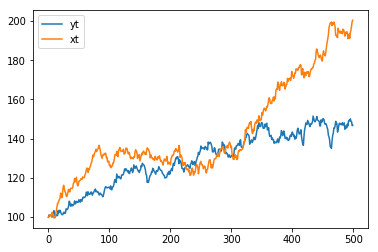

In [89]:
rw_drift1 = 100 * np.cumprod(np.random.normal(loc=.001, scale=.01, size=500) + 1)
plt.plot(rw_drift1, label= 'yt')
rw_drift2 = 100 * np.cumprod(np.random.normal(loc=.002, scale=.01, size=500) + 1)
plt.plot(rw_drift2,label= 'xt')
plt.legend()
plt.show()

# 8. Multivariate processes with unit roots


## Spurious regression


$x_t = x_{t-1} + \epsilon_{t i}, \epsilon~iid(o,\sigma^2)$

$y_t = y_{t-1} + \epsilon_{t i}, \epsilon~iid(o,\sigma^2)$

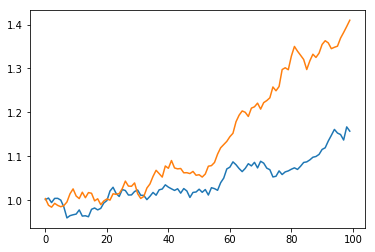

In [88]:
drift1 = np.cumprod(np.random.normal(loc=.001, scale=.01, size=100)+1)
plt.plot(drift1)
drift2 = np.cumprod(np.random.normal(loc=.001, scale=.01, size=100)+1)
plt.plot(drift2)
plt.show()

# 9. Cointegration

## 9.1 Testing for cointegration

$$y_t - \beta x_t=\varepsilon_t$$

If there is a relationship between $y_t$ and $x_t$ then $\varepsilon_t$ should be stationary I(0) & weakly dependent

- But we don't know the parameter $\beta$

- Thus we need to run least squares:

$$y_t=\hat\alpha +\hat\beta x_t +\hat u_t\\
\hat u_t = y_t-\alpha-\beta x_t$$

If $y_t$ and $x_t$ are I(1) then $\hat u_t$ should be an I(0) process.

**We check this by running a DF test on $\hat u_t$**



$\Delta \hat u_t = \delta_0 + \delta_1 \hat u_{t-1}+\cdots + v_t$

- Calculate T-stat for $\delta_1$ then compare to DF distribution
- If T< DF is less than critical value of DF, we reject null and conclude that our error is I(0)
- In other words if we reject the null we have cointegration between our variables

- Because the T stat is for $\hat\beta$ rather than the true $\beta$, we have to ammend the DF distribution because we are estimating $\beta$.
-  This DF (lets denote as $DF_2$, where our original is $DF_1$) is slightly more stringent than the original DF.
    - $t<DF_2<DF_1$
- This makes it less likely we reject the null hypothesis which we write below:

$
H_0: \beta=0\\
H_1: \beta\neq0$

- The null is that we have run a spurious regression 
- If $\beta$ is zero it means $y_t$ and $x_t$ are not integrated
- It is only under the case that we reject the null that we potentially have co-integration

### 9.1.1 Python example: RW drift

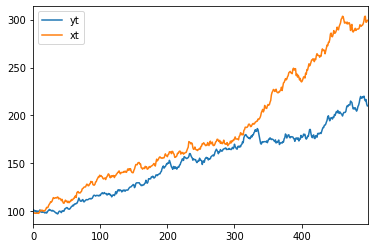

In [3]:
rwdrift1 = 100 * np.cumprod(np.random.normal(loc=.001, scale=.01, size=500) + 1)
plt.plot(rwdrift1, label= 'yt')
rwdrift2 = 100 * np.cumprod(np.random.normal(loc=.002, scale=.01, size=500) + 1)
plt.plot(rwdrift2,label= 'xt')
plt.legend()
plt.margins(x=0)
plt.show()

### 9.1.2 Python example

In [4]:
y = rwdrift1
x = rwdrift2
result = sm.OLS(y, x).fit()
b = result.params[0]
test = (y-(b*x))
adf_stats = adfuller(test.ravel())
if adf_stats[1]<0.05:
    print("The p-value for the ADF test is: {:.3f}".format(adf_stats[1]))
    print('Reject the null of spurious regression')
else:
    print("The p-value for the ADF test is: {:.3f}".format(adf_stats[1]))
    print('Cannot reject the null of spurious regression')
    print('Thus we have evidence of spurious regression')

The p-value for the ADF test is: 0.841
Cannot reject the null of spurious regression
Thus we have evidence of spurious regression


## 9.3 Error correction model

$$y_t =  c +\delta_1x_t+\delta_2x_{t-1}+\mu y_{t-1}+v_t\\
y_t-y_{t-1}=c + \delta_1x_t+\delta_2x_{t-1} -(1-\mu) y_{t-1}+v_t\\
\Delta y_t= c + \delta_1x_t+\delta_2x_{t-1} -(1-\mu) y_{t-1}+v_t\\
\Delta y_t = c+\delta_1 \Delta x_t - \lambda(y_{t-1}-\alpha-\beta x_{t-1})+v_t
$$

Where:
- $\lambda =1-\mu$
- $\beta = \frac{\delta_1+\delta_2}{1-\mu}$


- If $y_t, x_t = I(1) \Rightarrow \Delta y_t ,\Delta y_t= I(0)$
- If long run relationship exists between y and x exists then $\lambda(y_{t-1}-\alpha-\beta x_{t-1})$ will be co-integrated and the term will be I(0)



- Imagine that $y_{t-1}>\lambda(y_{t-1}-\alpha-\beta x_{t-1})$. 
    - Then it is above equilibrium value, and the change in $\Delta y_t$ will be slightly negative "correcting" the model
 
### Error correction model pt. 2

$$\Delta y_t = \delta_0 + \sum^{p}_{i=0} \delta_i \Delta x_{t-i} + \sum_{j=1}^{k}\mu_j \Delta y_{t-j}-\lambda(y_{t-1}-\delta-\beta x_{t-1})+\varepsilon_t$$

- The summations represent the short term dynamics of the model with i and j lags.
- The $\lambda$ term is long run dynamics


#### We can estimate $\alpha, \beta$ using least squares

$$\Delta y_t = \delta_0 + \sum^{p}_{i=0} \delta_i \Delta x_{t-i} + \sum_{j=1}^{k}\mu_j \Delta y_{t-j}+\gamma_0 \hat{v_t}\\
\hat\lambda = -\hat\gamma_0\\
0<\lambda<1$$

- The reason $\lambda$ is less then 1 is because we don't want the variable to fully adust to the dis-equilibrium.
    - Ex: $\lambda=.5$ means that it steps half of the way towards equilibrium assuming there are no other short-run dynamics

If $y_t> y^{\text{Equilibrium}}$ then there is negative change in y